# Coupled oscillators

We start with two coupled oscillators described by following -

$$
\frac{d^2x_1}{dt^2} = -\omega_1^2 x_1 + \lambda_1 x_1x_2
$$
$$
\frac{d^2x_2}{dt^2} = -\omega_2^2 x_2 + \lambda_2 x_1x_2
$$

or, equivalently

$$
\frac{dx_1}{dt} = v_1\qquad\frac{dv_1}{dt} = -\omega_1^2 x_1 + \lambda_1 x_1x_2\qquad
\frac{dx_2}{dt} = v_2\qquad\frac{dv_2}{dt} = -\omega_2^2 x_2 + \lambda_2 x_1x_2
$$


In [192]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
class osc:
    def __init__(self, freq, damping, coupling):
        assert len(freq) == len(coupling)
        self.N = len(freq)
        self._freq = np.asarray(freq)
        self._coupling = np.asarray(coupling)
        self._damping = np.asarray(damping)
    #
    def _get_freq(self):
        return self._freq
    def _set_freq(self, freq):
        self._freq[:] = freq
    freq = property(fget=_get_freq, fset=_set_freq, doc='frequencies of the oscillator')
    def _get_damp(self):
        return self._damping
    def _set_damp(self, damping):
        self._damping[:] = damping
    damping = property(fget=_get_damp, fset=_set_damp, doc='damping of the oscillator')
    def _get_coup(self):
        return self._coupling
    def _set_coup(self, coupling):
        self._coupling[:] = coupling
    coupling = property(fget=_get_coup, fset=_set_coup, doc='coupling of the oscillator')
    def __call__(self, t: float, x: np.ndarray):
        pos, vel = x[::2], x[1::2]
        f = np.zeros(2 * self.N)
        f[1::2] = -self.freq**2 * pos + self.coupling * np.prod(pos) - self.damping * vel
        f[0::2] = vel
        return f
    #

"""
class osc:
    def __init__(self, freq, coupling):
        assert len(freq) == len(coupling)
        self.N = len(freq)
        self._freq = np.asarray(freq)
        self._coupling = np.asarray(coupling)
    #
    @property
    def freq(self): return self._freq
    @freq.setter
    def freq(self, freq): self._freq[:] = freq
    @property
    def coupling(self): return self._coupling
    @coupling.setter
    def coupling(self, coupling): self._coupling[:] = coupling
    def __call__(self, t, x: np.ndarray):
        pos, vel = x[::2], x[1::2]
        f = np.zeros(2 * self.N)
        f[::2] = -self.freq**2 * pos + self.coupling * np.prod(pos)
        f[1::2] = vel
        return f
    #
"""


'\nclass osc:\n    def __init__(self, freq, coupling):\n        assert len(freq) == len(coupling)\n        self.N = len(freq)\n        self._freq = np.asarray(freq)\n        self._coupling = np.asarray(coupling)\n    #\n    @property\n    def freq(self): return self._freq\n    @freq.setter\n    def freq(self, freq): self._freq[:] = freq\n    @property\n    def coupling(self): return self._coupling\n    @coupling.setter\n    def coupling(self, coupling): self._coupling[:] = coupling\n    def __call__(self, t, x: np.ndarray):\n        pos, vel = x[::2], x[1::2]\n        f = np.zeros(2 * self.N)\n        f[::2] = -self.freq**2 * pos + self.coupling * np.prod(pos)\n        f[1::2] = vel\n        return f\n    #\n'

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.655e-03 ...  1.131e+02  1.131e+02]
        y: [[-3.000e-01 -2.830e-01 ... -2.288e-03 -2.231e-03]
            [ 3.000e+00  3.000e+00 ...  1.022e-02  1.022e-02]
            [ 3.000e-01  3.169e-01 ...  1.189e-03  1.247e-03]
            [ 3.000e+00  2.983e+00 ...  1.027e-02  1.021e-02]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x1457f83d0>
 t_events: None
 y_events: None
     nfev: 1964
     njev: 0
      nlu: 0


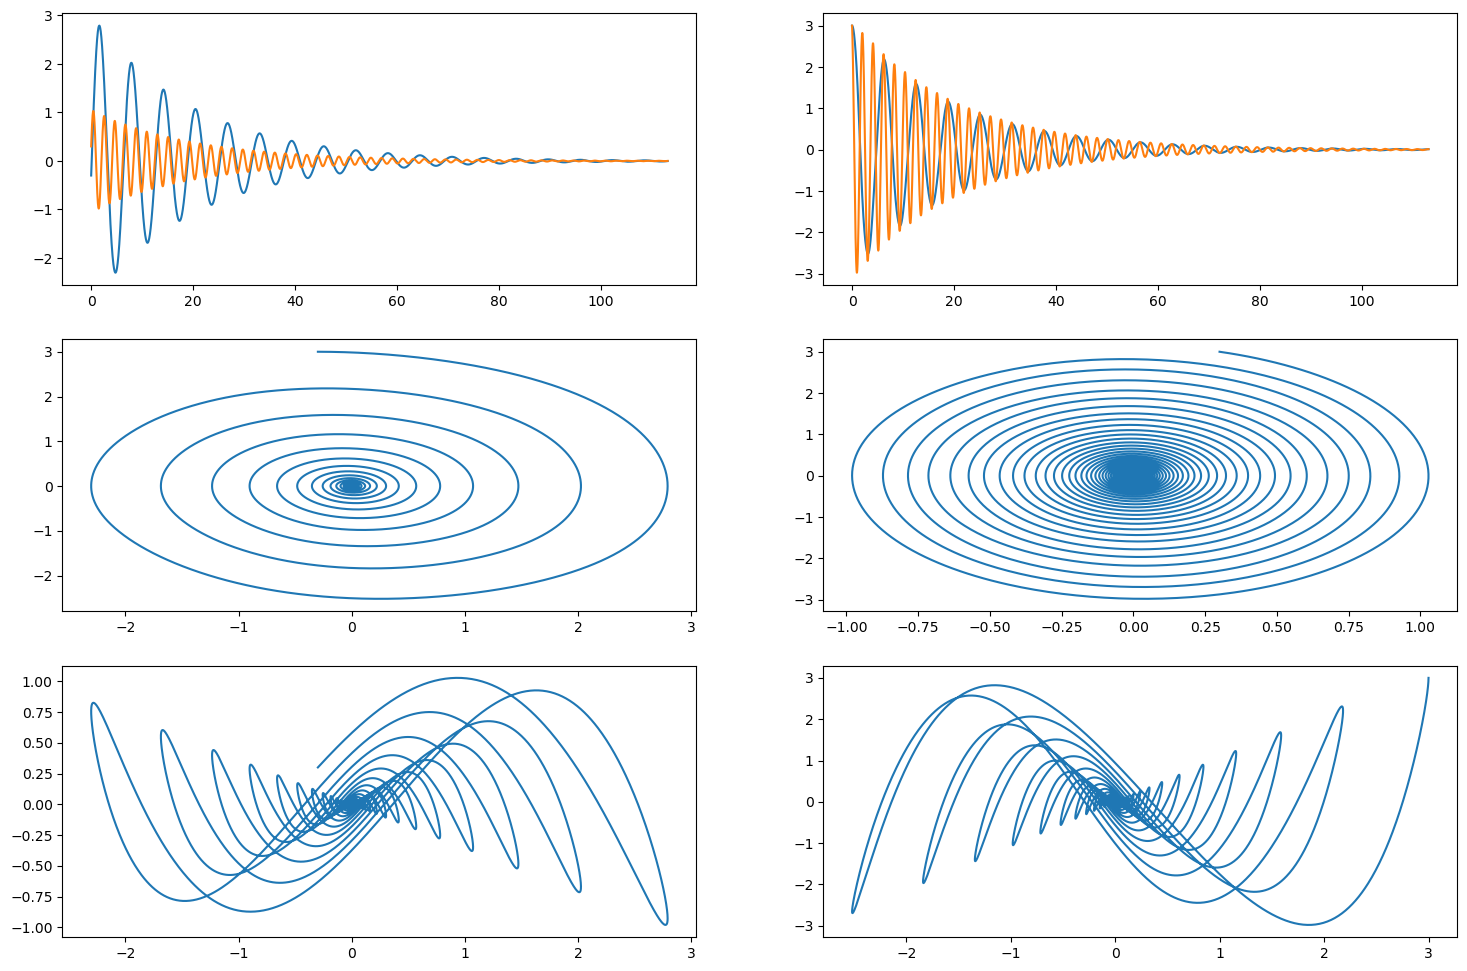

In [194]:
x_init = np.array([-0.3, 3, 0.3, 3]) # x1, v1, x2, 
func = osc(freq=[1, 1], damping=[0.1, 0.1], coupling=[0.1, 0.1])
func.coupling = [0.1, 0.1]
func.freq = [1, 3]
t_start, t_finish = 0, 36 * np.pi
t = np.linspace(t_start, t_finish, 20000)

res = solve_ivp(func, t_span=(t_start, t_finish), t_eval=t, y0=x_init, dense_output=True)
tt, y = res['t'], res['y']
print(res)
fig, ax = plt.subplots(3, 2, figsize=(18,12))
ax.shape = (6,)
ax[0].plot(tt, y[0], tt, y[2])
ax[1].plot(tt, y[1], tt, y[3])
ax[2].plot(y[0], y[1])
ax[3].plot(y[2], y[3])
ax[4].plot(y[0], y[2])
ax[5].plot(y[1], y[3])
plt.show()

In [121]:
y[:, :12].T

array([[0.        , 1.        , 0.        , 1.        ],
       [0.        , 1.00003142, 0.        , 1.00003142],
       [0.        , 1.00006284, 0.        , 1.00006284],
       [0.        , 1.00009426, 0.        , 1.00009426],
       [0.        , 1.00012568, 0.        , 1.00012568],
       [0.        , 1.00015711, 0.        , 1.00015711],
       [0.        , 1.00018853, 0.        , 1.00018853],
       [0.        , 1.00021996, 0.        , 1.00021996],
       [0.        , 1.00025138, 0.        , 1.00025138],
       [0.        , 1.00028281, 0.        , 1.00028281],
       [0.        , 1.00031424, 0.        , 1.00031424],
       [0.        , 1.00034567, 0.        , 1.00034567]])

In [142]:
res

  message: Required step size is less than spacing between numbers.
  success: False
   status: -1
        t: [ 0.000e+00  1.257e-03 ...  4.098e+00  4.100e+00]
        y: [[ 0.000e+00  1.257e-03 ...  1.165e+06  5.853e+06]
            [ 1.000e+00  1.000e+00 ...  1.027e+09  1.157e+10]
            [ 0.000e+00  1.257e-03 ...  1.165e+06  5.853e+06]
            [ 1.000e+00  1.000e+00 ...  1.027e+09  1.157e+10]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x14705a470>
 t_events: None
 y_events: None
     nfev: 1082
     njev: 0
      nlu: 0